<h1 style="text-align: center;"> Práctica series temporales </h1>
<h1 style="text-align: center; font-size: 30px"> BTC en SAR </h1>
<h1 style="text-align: right; font-size: 24px; margin-right: 10px;">Guillermo Díaz Aguado</h1>

# 1. Presentación de la serie a analizar. 
En este estudio, analizaremos los datos históricos del Bitcoin (BTC) en el mercado saudí, expresados en Riyal Saudí (SAR) y Dólar Estadounidense (USD).
Nuestro objetivo es identificar patrones, tendencias y estacionalidades en los precios de BTC en SAR, ya que tenemos muy visto los valores en USD (en SAR habrá pequeñas fluctuaciones con respecto al USD puesto que esta moneda habrá tenido sus propios momentos de inflacción y deflacción).
Se que no es la serie temporal más innovadora que habrás visto pero quería hacer el trabajo de algo que me pueda favorecer en el entendimiento de las monedas digitales, podría haber tirado por haber hecho una serie temporal del tiempo en España, pero sé que para mí esta es mas fructifera. 

**Lo siento mucho pero son las 23:33 del 20/03 y acabo de darme cuenta que la serie que debemos escoger debe ser estacional y de unos 150 valores, me siento estupido y ahora mismo no me da tiempo a corregirlo todo**

Este conjunto de datos incluye registros diarios con variables clave como:

* <span style="color:lime;">date</span> (Fecha): Día en que se registró el precio del BTC.
* <span style="color:lime;">open</span> (Precio de Apertura (SAR/USD)): Valor del BTC al inicio de la sesión.
* <span style="color:lime;">close</span> (Precio de Cierre (SAR/USD)): Último precio registrado en el día.
* <span style="color:lime;">Low</span> (Precio Mínimo (SAR/USD)): Mayor precio alcanzado dentro de la jornada de negociación.
* <span style="color:lime;">High</span> (Precio Máximo (SAR/USD)): Mayor precio alcanzado dentro de la jornada de negociación.
* <span style="color:lime;">Voluem</span> (Volumen de Comercio): Representa el número de unidades del activo que han sido compradas y vendidas.


# 2. Representación gráfica y descomposición de la misma. 

In [252]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8-darkgrid')


In [253]:
dataset = pd.read_csv("dc.csv")
dataset['date'] = pd.to_datetime(dataset['date'], format='%Y-%m-%d')
dataset.head()

,date,open_SAR,open_USD,high_SAR,high_USD,low_SAR,low_USD,close_SAR,close_USD,volume
0,2021-01-30,128437.248512,34246.28,131012.723200,34933.00,123106.880000,32825.00,128333.212416,34218.54,43072
1,2021-01-29,125144.022272,33368.18,144510.037760,38531.90,119695.516160,31915.40,128459.450880,34252.20,231827
2,2021-01-28,113870.357376,30362.19,126703.438592,33783.98,111919.811840,29842.10,125131.570944,33364.86,92621
3,2021-01-27,121753.023104,32464.01,122102.860416,32557.29,109668.146688,29241.72,113885.208960,30366.15,95911
4,2021-01-26,120966.114176,32254.19,123470.218752,32921.88,115652.472448,30837.37,121767.124608,32467.77,84972


In [254]:
dataset.index = dataset["date"]
dataset = dataset.sort_index()
dataset.index.freq = "D"

In [255]:
dataset.drop(columns=["date"], inplace=True)

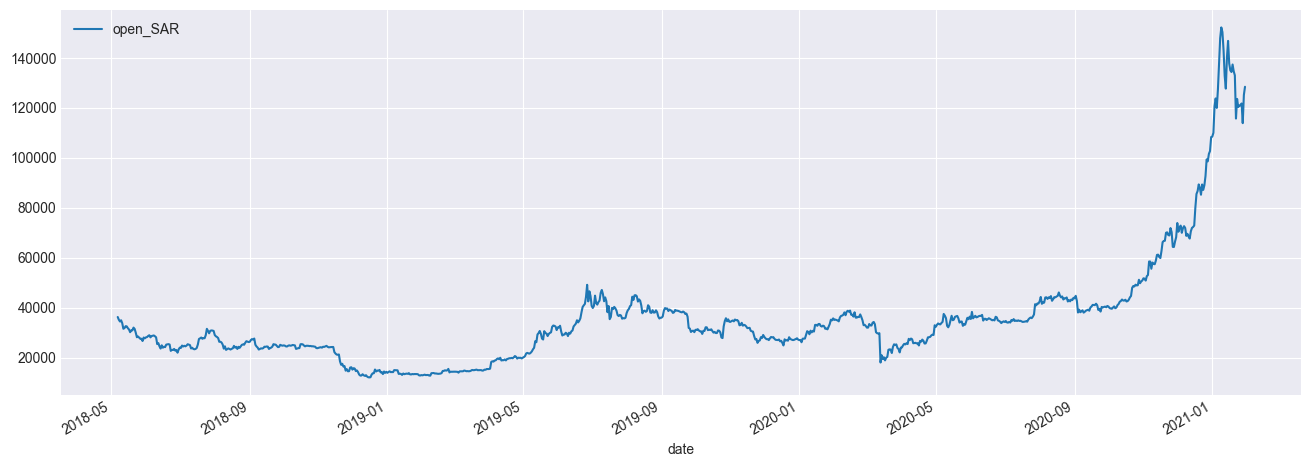

In [256]:

columnas_deseadas = ["open_SAR"]
df = dataset[columnas_deseadas]


plt.figure(figsize=(16,5))
sns.lineplot(df)
plt.xticks(rotation=30, ha="right")
plt.show()

## 2.1 Descomposición de los datos.

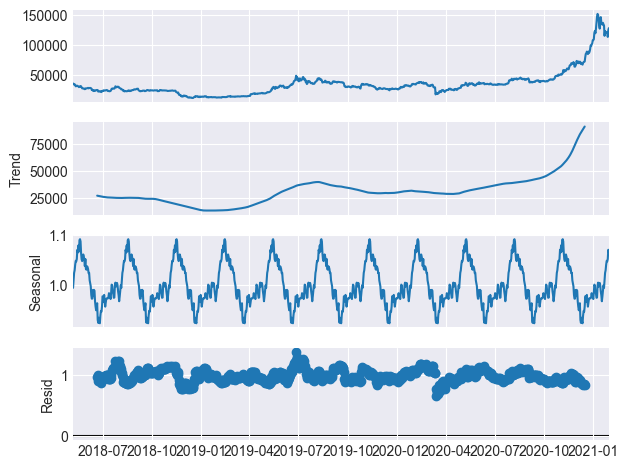

In [257]:
from statsmodels.tsa.seasonal import seasonal_decompose

periodo_estacional = 90
result = seasonal_decompose(df, model="mult", period=periodo_estacional)
result.plot()
plt.show()

Viendo la descomposición se puede deducir que no es estacionaria. 
* He usado el modelo multiplicativo porque la variabilidad estaba correlacionada con la tendencia y he creido que es el modelo que mejor divide la serie temporal.
* Para la estacionalidad he ido probando y al final el que me da mejor resultado es el de periodo trimestrales, además tiene su lógica financiera que el bitcoin tenga una estacionalidad trimestral

Para nuestro analísis lo más efectivo sería convertirla en una **serie temporal estacionaria**. Las series temporales son estacionarias cuando:
* Tienen media constante
* Tienen varianza constante
* Su autocovarianza no depende del tiempo, -> la autocovarianza es la covarianza entre la serie temporal y la misma serie temporal pero con retraso.

Razones por las que convertir una serie no estacionaria en una estacionaria:

* Predecir una serie estacionaria es mas sencillo y fiable que una no estacionaria.
* Sabemos que una regresion lineal trabaja mejor si los predictores no estan correlacionados estre ellos. Así que al hacerla estacionaria estaremos eliminando cualquier acutocorrelación persistente. 

### Verificación de una serie estacionaria.
Podemos saber si una serie es estacionaria usando alguno de estos 2 métodos:
* $\underline{\text{Estadisticos moviles}}$: Se basa en realizar la media móvil y la varianza móvil para saber, de un vistazo, si estas se mantienen constante con el tiempo.
* $\underline{\text{El test de Dickey-fuller}}$: Es un test estadístico que nos indica si es estacionaria o no.

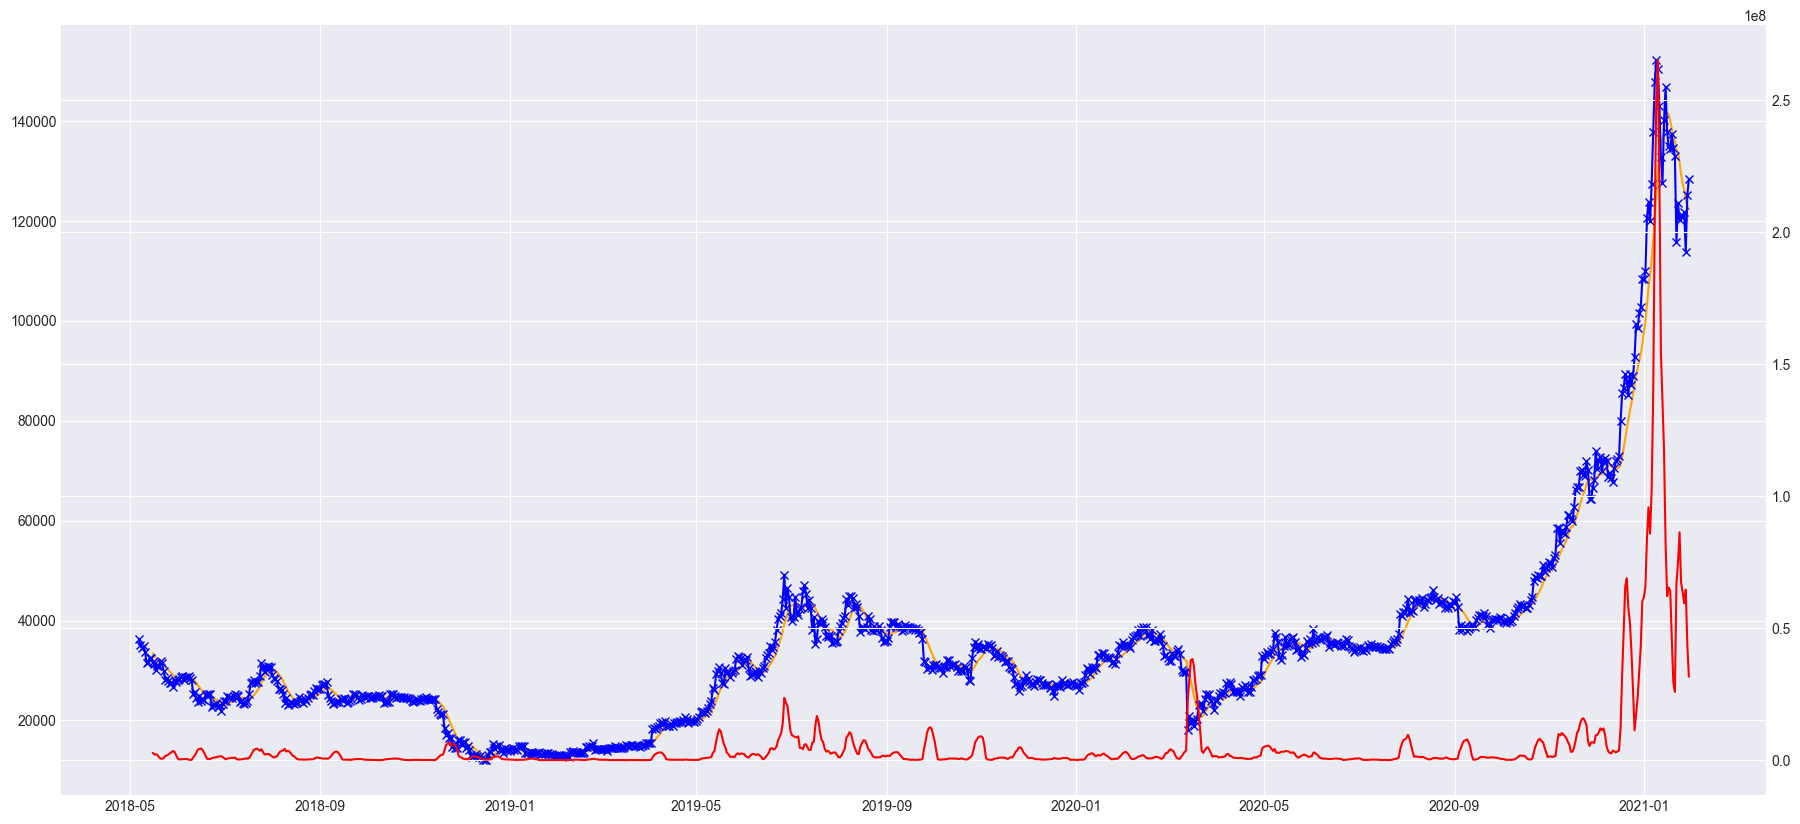

In [258]:
def verif_est_moviles(df, window):
    movil = df.rolling(window=window)
    media_movil = movil.mean()
    var_movil = movil.var()
    
    fig, ax1 = plt.subplots(figsize=(22,10))

    ax1.plot(media_movil, color="orange", label="Medias móviles")
    ax1.plot(df, color="blue", marker="x", label="Observaciones")

    ax2 = ax1.twinx()
    ax2.plot(var_movil, color="red", label="Varianzas móviles")
    
    plt.show()

verif_est_moviles(df, 10)

In [259]:
from statsmodels.tsa.stattools import adfuller

def ver_adfuller(df):
    result = adfuller(df, autolag="AIC")
    print('Test statistic: ', result[0])
    print('p-value: ', result[1])
    print('Critical Values:',result[4])

ver_adfuller(df)

Test statistic:  2.3061578094106716
p-value:  0.9989590611590644
Critical Values: {'1%': -3.4370334797663844, '5%': -2.8644907213150725, '10%': -2.568341114581742}


Como podemos ver, tanto en método de los estadisticos móviles, como el test adfuller, estos no son estacionarios.

### Suavizado de la tendencia.
* $\underline{\text{Suavizado de las medias moviles}}$ Restar la linea que mejor encaja en la serie (una media movil, o una especie de recta de regresion con todos los puntos)
* $\underline{\text{Serie diferenciada}}$ La idea de este método es hacer el cálculo de la diferencia entre la serie y la serie en un instante anterior.



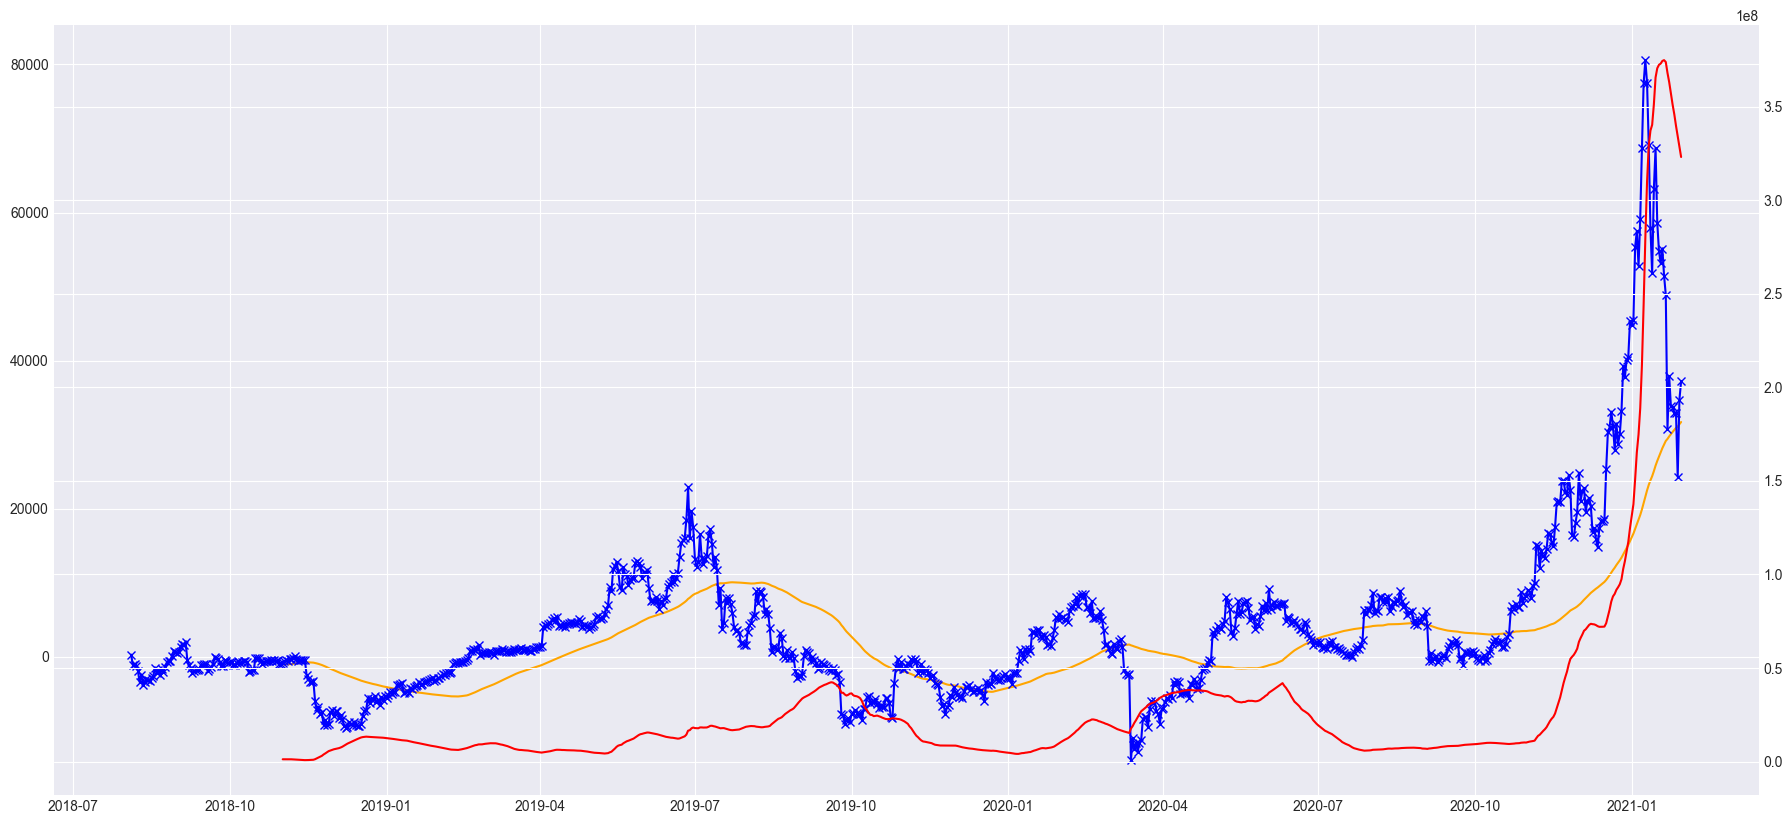

Test statistic:  -0.8966619178624938
p-value:  0.7890697082443177
Critical Values: {'1%': -3.4377022625762232, '5%': -2.8647856243940817, '10%': -2.568498194061815}


In [260]:
# Suavizado de las medias móviles
def medias_moviles(df, window):
    media_movil = df.rolling(window=window).mean()
    diff_media_movil = df - media_movil
    diff_media_movil.dropna(inplace=True)
    return diff_media_movil

window = periodo_estacional
diff_media_movil = medias_moviles(df, window)
verif_est_moviles(diff_media_movil, window)
ver_adfuller(diff_media_movil)

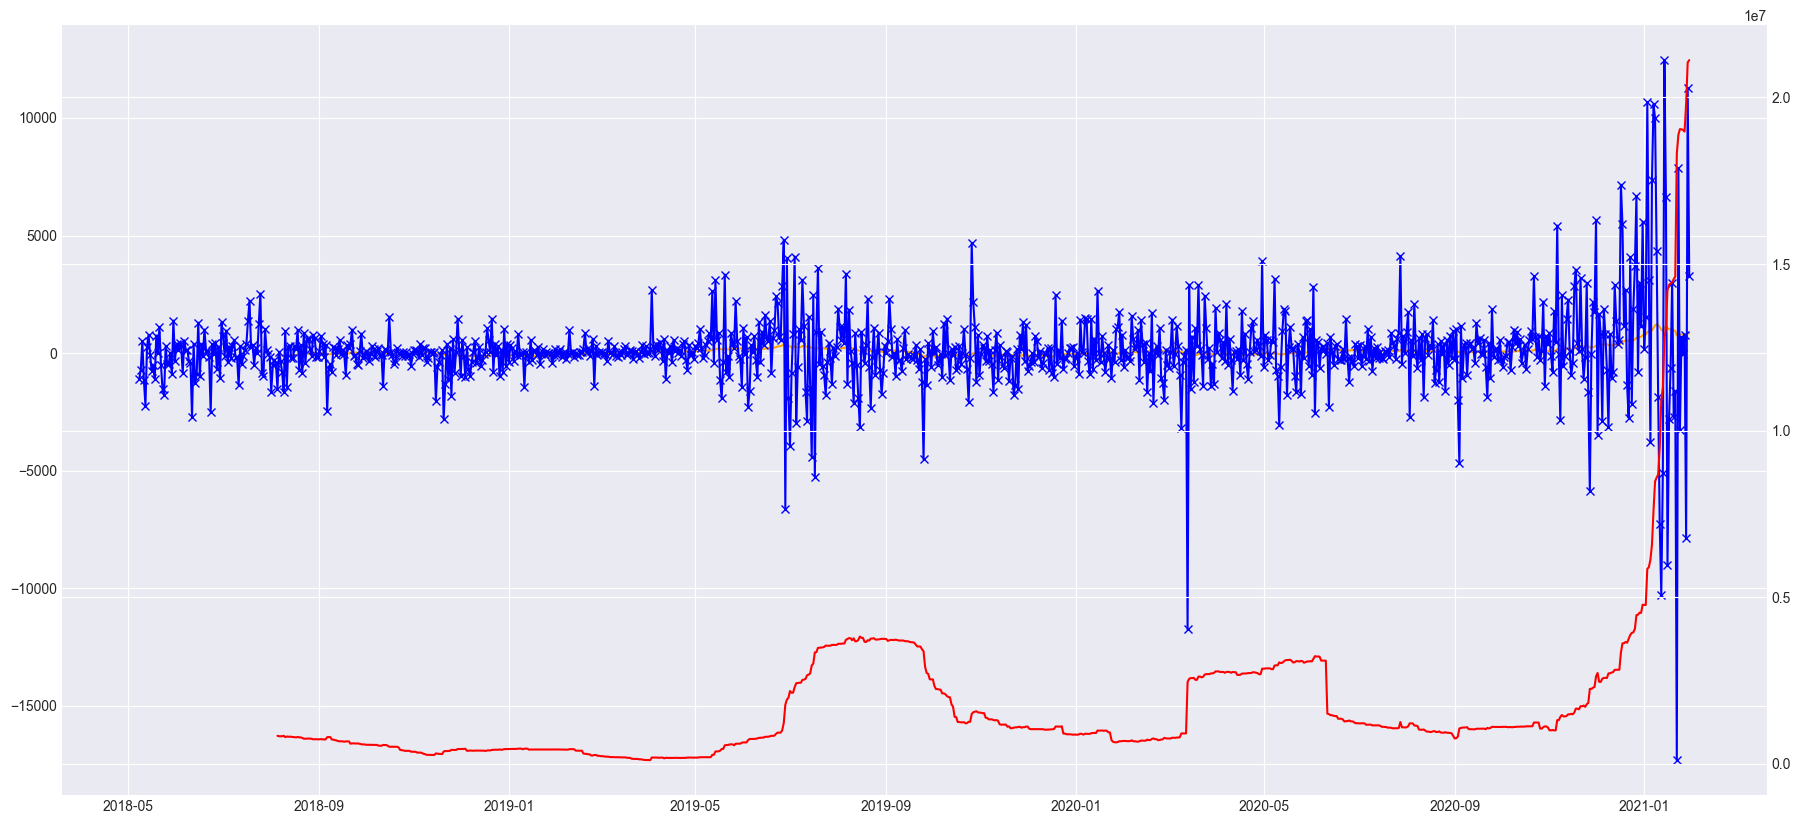

Test statistic:  -7.265280804408664
p-value:  1.6411675877331976e-10
Critical Values: {'1%': -3.4370334797663844, '5%': -2.8644907213150725, '10%': -2.568341114581742}


In [261]:
def serie_diferen(df):
    df_diff = df - df.shift()
    df_diff.dropna(inplace=True)
    return df_diff

df_diff = serie_diferen(df)
verif_est_moviles(df_diff, window)
ver_adfuller(df_diff)


### Suavizado de la varianza:
* Transformación de datos mediante el logaritmo.
* Transformación de datos mediante la raiz cuadrada.

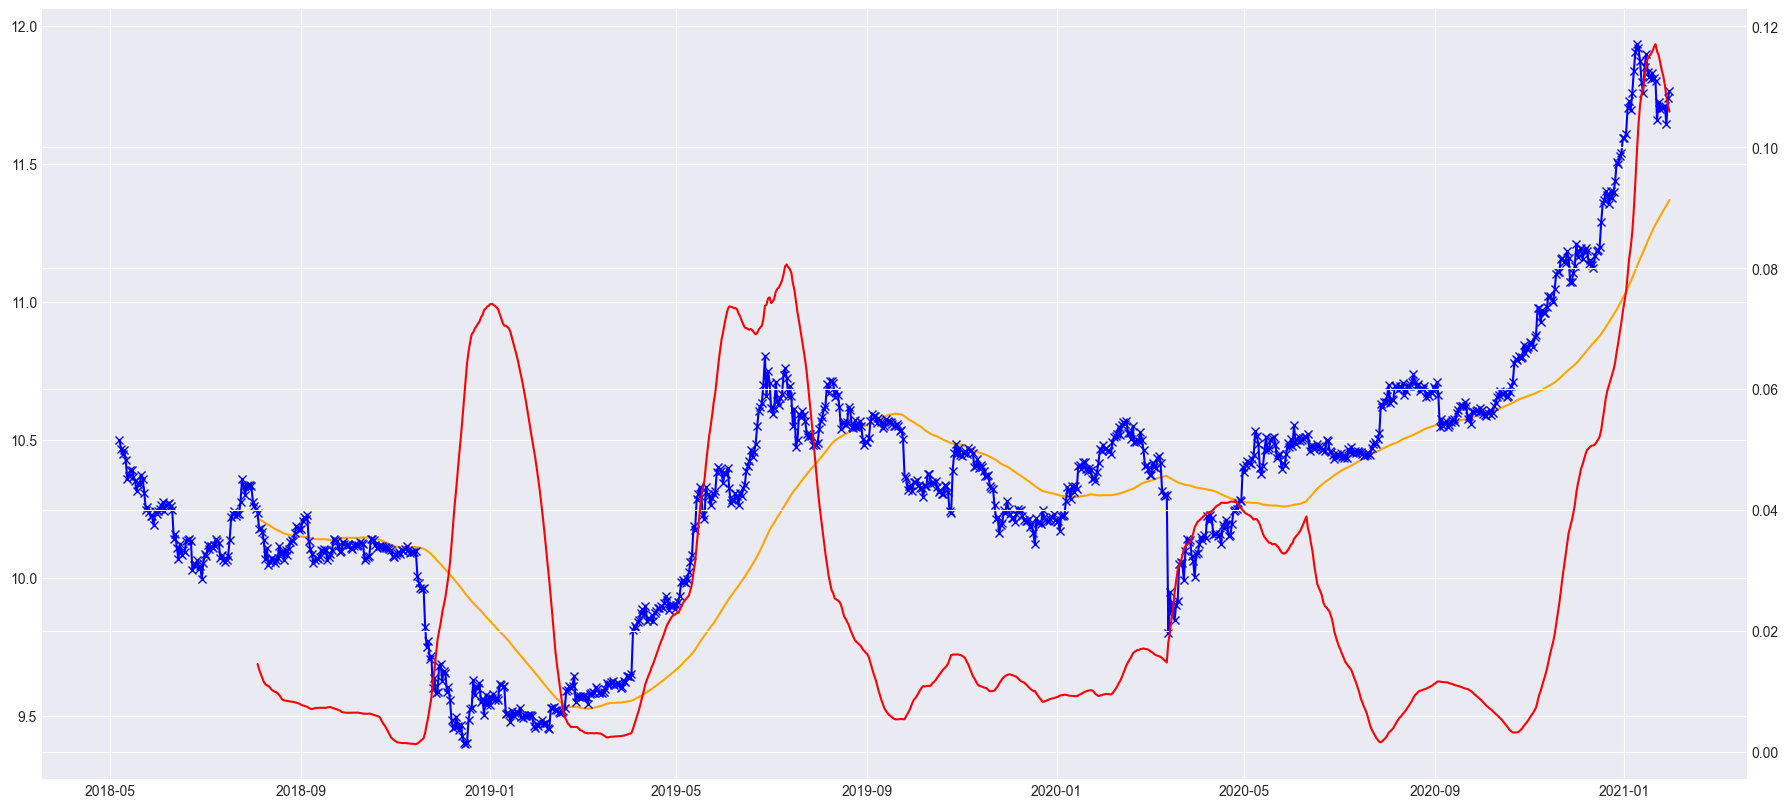

Test statistic:  0.5697757043589039
p-value:  0.9868464691102689
Critical Values: {'1%': -3.4369259442540416, '5%': -2.8644432969122833, '10%': -2.5683158550174094}


In [262]:
# Transformación logaritmica. 
df_log = np.log(df)
verif_est_moviles(df_log, window)
ver_adfuller(df_log)

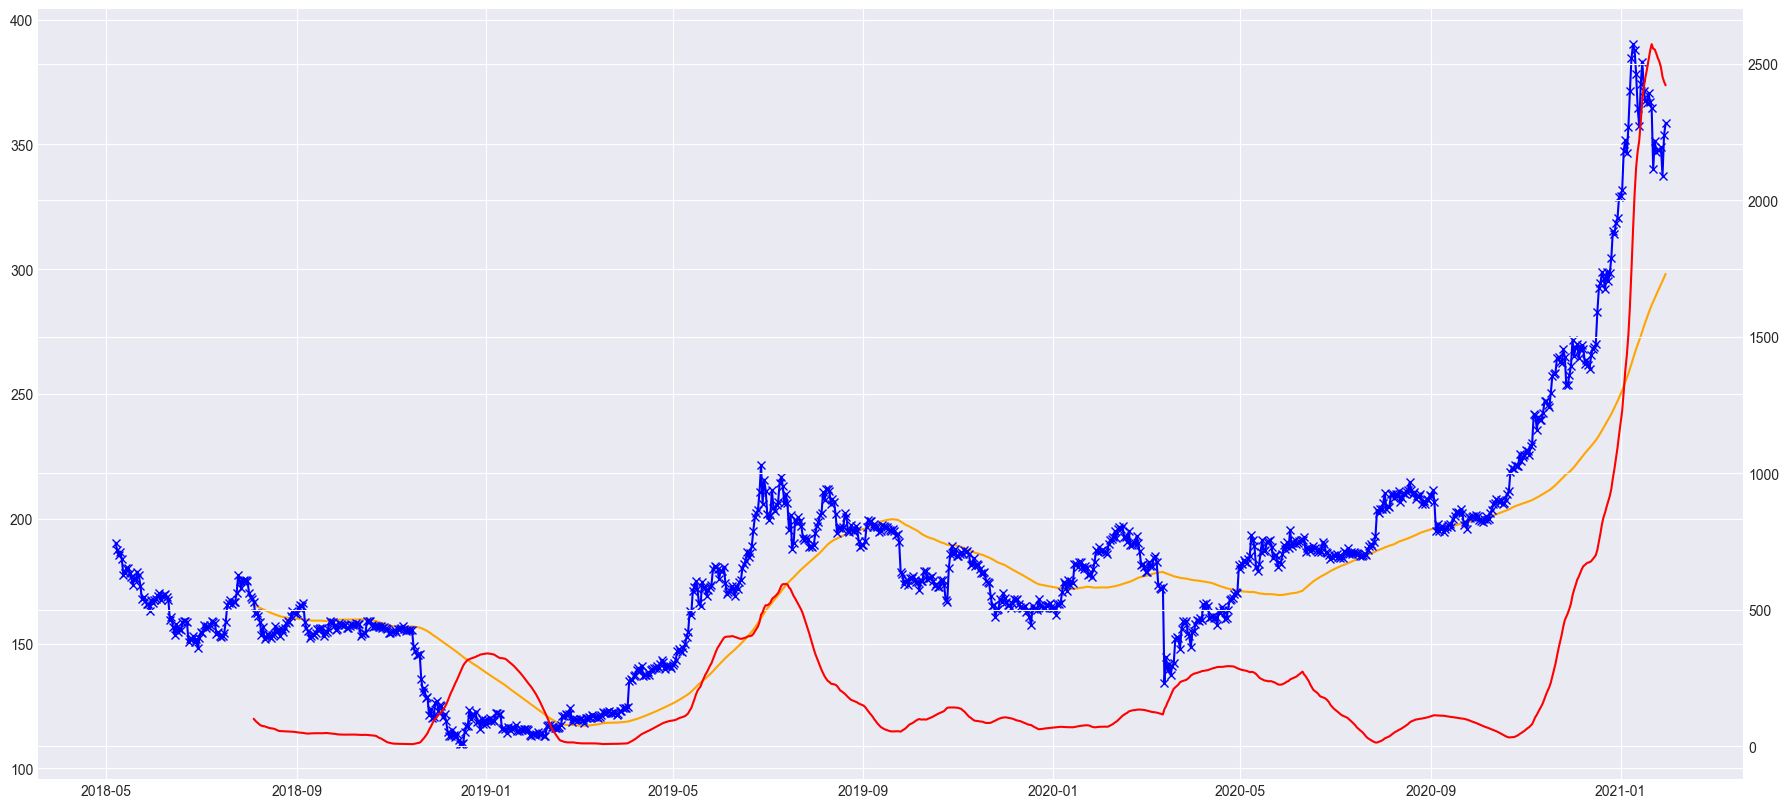

Test statistic:  1.8068883569325689
p-value:  0.998362581607221
Critical Values: {'1%': -3.4369193380671, '5%': -2.864440383452517, '10%': -2.56831430323573}


In [263]:
# Transformación logaritmica. 
df_sqrt = np.sqrt(df)
verif_est_moviles(df_sqrt, window)
ver_adfuller(df_sqrt)

De manera individual el suavizado de la tendencia no arregla el problema con la varianza y pasa algo parecido con los métodos del suavizado de la varianza, por lo que vamos a usar los dos métodos que mejores resultados nos han dado:
* $\underline{\text{Serie diferenciada}}$
* $\underline{\text{Transformación logaritmica}}$

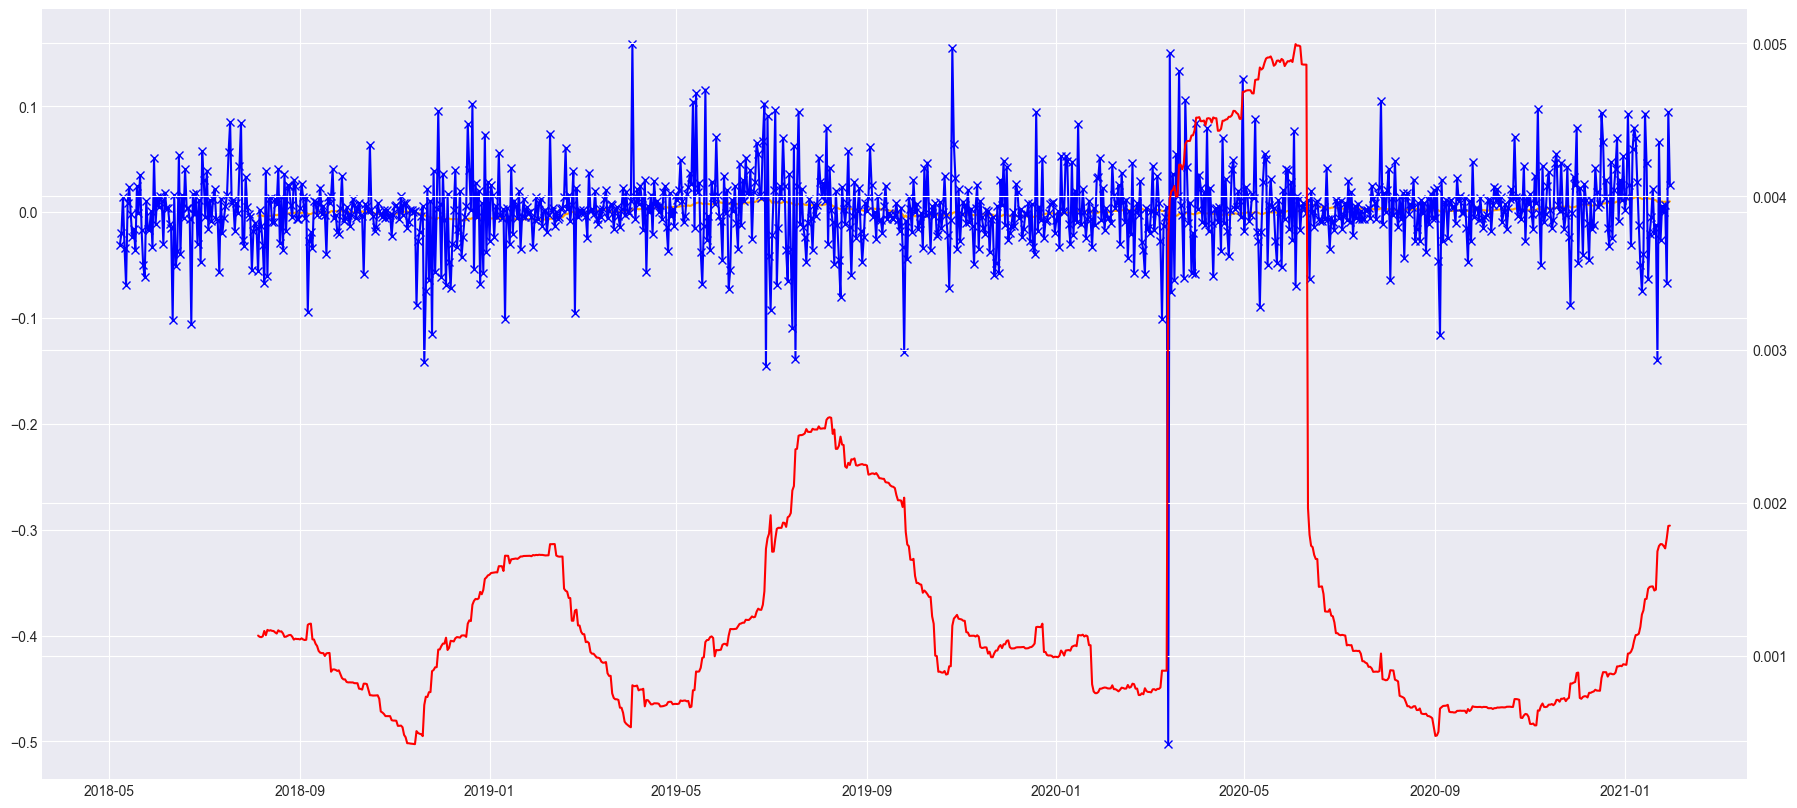

Test statistic:  -21.69670736447956
p-value:  0.0
Critical Values: {'1%': -3.4369259442540416, '5%': -2.8644432969122833, '10%': -2.5683158550174094}


In [264]:
df_fin = np.log(df).diff()
df_fin.dropna(inplace=True)

verif_est_moviles(df_fin, window)
ver_adfuller(df_fin)

ESTO YA ES OTRA COSA. Como se puede apreciar es una serie bastante estacionaria.

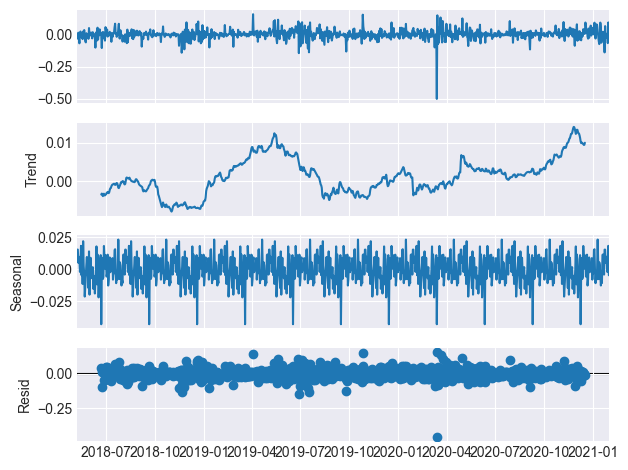

In [265]:
result = seasonal_decompose(df_fin, model="additive", period=periodo_estacional)
result.plot()
plt.show()

# 3. Separar training y test. 
Para comprobar la eficacia de predicción de nuestros modelos vamos a utilizar el último periodo de nuestra serie temporal como test. 
Hay algunos modelos que se usan cuando la serie es estacionaria y otros cuando no hace falta que sea estacionaria, por ello vamos a usar ambos:
* df -> Serie no estacionaria.
* df_fin -> Serie estacionaria.

Un punto a tener en cuenta es que he decidio usar las ultimas 60 observaciones para el test porque al darle 90, los modelos no eran capaces de predecir la abrupta subida que iba a tener el bitcoin

In [266]:
periodo = 60
tamano_test = periodo

train = df.iloc[:-tamano_test]
test = df.iloc[-tamano_test:]

train_fin = df_fin.iloc[:-tamano_test]
test_fin = df_fin.iloc[-tamano_test:]

# 4. Encontrar el modelo de suavizado exponencial más adecuado.

## 4.1. Modelo de alisado simple.
Este metodo se adapta bien para las series temporales donde no se pueda apreciar una tendencia o alguna estacionalidad. Se basa en la idea de dar pesos a los valores anteriores a la prediccion, y en funcion de estos pesos y de sus valores calcular una "media ponderada"
Los pesos que se le da a cada valor vendrá determinado por $\alpha$ que es el valor de suavizado y por lo pasado que este la observación a tratar con respecto a la predicción (siempre las observaciones mas cercanas tendrán mayor peso). Igualmente cuanto mayor es el $\alpha$ , mayor será la importancia que le queramos dar a las observaciones cercanas.
$$ 
\hat{x}_{t+1} = \alpha \sum_{k=0}^{\infty} (1-\alpha)^k x_{t-k}
$$

In [267]:
alphas = [0.2, 0.4, 0.6, 0.8]

valores_alpha = []
for i in alphas:
    alpha = [i*(1-i)**(x)for x in range(5)]
    valores_alpha.append(alpha)
columnas_alpha = ["y"+str(i) for i in range(1, 6)]
pd.DataFrame(valores_alpha, columns=columnas_alpha, index=alphas)

,y1,y2,y3,y4,y5
0.2,0.2,0.16,0.128,0.1024,0.08192
0.4,0.4,0.24,0.144,0.0864,0.05184
0.6,0.6,0.24,0.096,0.0384,0.01536
0.8,0.8,0.16,0.032,0.0064,0.00128


In [268]:
import statsmodels.api as sm

modelo_ses = sm.tsa.SimpleExpSmoothing(train_fin, initialization_method="estimated").fit(optimized=True)
prediccion_ses = modelo_ses.forecast(steps=tamano_test)

print(f"Mejor α: {modelo_ses.params['smoothing_level']}")
modelo_ses.summary()

Mejor α: 1.4901161193847656e-08


Dep. Variable:,open_SAR,No. Observations:,939
Model:,SimpleExpSmoothing,SSE,1.366
Optimized:,True,AIC,-6130.746
Trend:,None,BIC,-6121.056
Seasonal:,None,AICC,-6130.703
Seasonal Periods:,None,Date:,"Thu, 20 Mar 2025"
Box-Cox:,False,Time:,23:21:25
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,1.4901e-08,alpha,True
initial_level,0.0007586,l.0,True


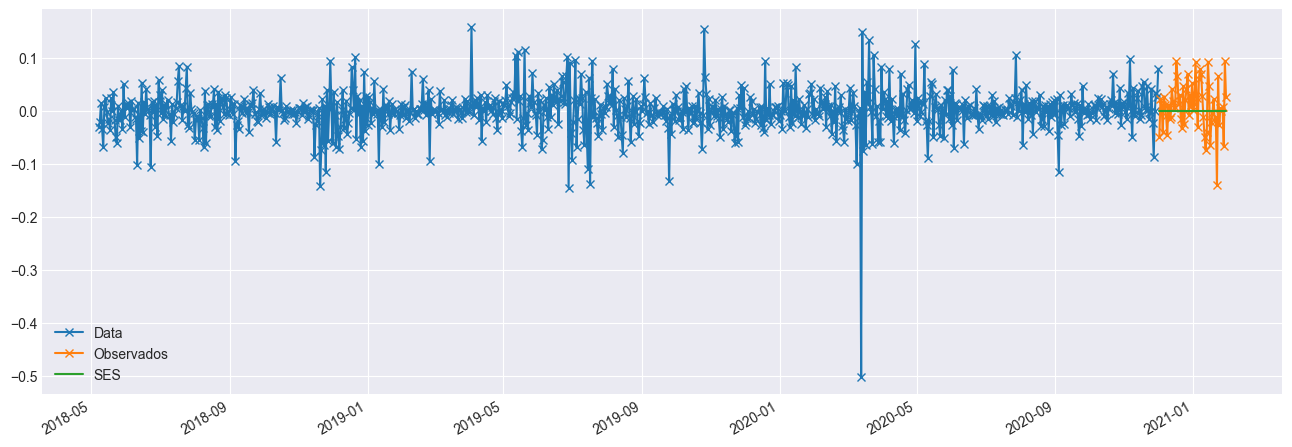

In [269]:
plt.figure(figsize=(16,5))

plt.plot(train_fin.index, train_fin, label="Data", marker="x")
plt.plot(test_fin.index, test_fin, label="Observados", marker="x")
plt.plot(test_fin.index, prediccion_ses, label="SES")

plt.xlabel=("Date")
plt.legend()
plt.xticks(rotation=30, ha='right')
plt.show()


Como podemos ver nos da una media y nos mantiene ese valor durante toda la serie, por lo que no es muy fiable. La ecaución para este apartado sería : 
$$ 
\hat{x}_{t+1} = \alpha \sum_{k=0}^{\infty} (1-\alpha)^k x_{t-k}
$$
Con un $\alpha = 1.4periodo1161193847656e-08$ que es casi igual a 0 

## 4.2. Modelo de alisado doble de Holt.
Este método se suele usar para series con tendencia pero sin estacionalidad. 
Es la suma de dos estimaciones: 
* **Estimación de la tendencia**:
$$
L_t = \alpha x_t + (1-\alpha)(L_{t-1}+b_{t-1})
$$
* **Estimación de la pendiente**:
$$
b_t = \Beta (L_t-L_{t-1})+(1-\Beta)b_{t-1}
$$

Nos queda al final la ecuación:
$$
\hat{x}_{t} = L_n + b_nm
$$


* **Nivel** $L_t$: Representa el valor base estimado de la serie en el tiempo $t$.  
* **Tendencia** $b_t$: Captura la pendiente o dirección del cambio a lo largo del tiempo.  
* $\alpha$ (parámetro de suavizado del nivel): Controla cuánto peso se da a los nuevos datos.  
* **B** (parámetro de suavizado de la tendencia): Determina cuánto influye la tendencia pasada en la actualización de la nueva tendencia.  

A diferencia del suavizado exponencial simple (donde la predicción es una línea horizontal), el método de Holt permite pronósticos linealmente crecientes o decrecientes, siguiendo la tendencia identificada.


In [270]:
modelo_holt = sm.tsa.ExponentialSmoothing(train, trend="mul", damped=False).fit()
prediccion_holt = modelo_holt.forecast(steps=tamano_test)

print(f"Mejor alpha: {modelo_holt.params['smoothing_level']}")
print(f"Mejor beta: {modelo_holt.params['smoothing_trend']}")
modelo_holt.summary()

Mejor alpha: 0.9242857142857143
Mejor beta: 0.02254355400696864


C:\Users\Usuario\AppData\Local\Temp\ipykernel_13296\3429688901.py:1: FutureWarning: the 'damped' keyword is deprecated, use 'damped_trend' instead.
  modelo_holt = sm.tsa.ExponentialSmoothing(train, trend="mul", damped=False).fit()
c:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


Dep. Variable:,open_SAR,No. Observations:,940
Model:,ExponentialSmoothing,SSE,1309957564.173
Optimized:,True,AIC,13306.538
Trend:,Multiplicative,BIC,13325.921
Seasonal:,None,AICC,13306.628
Seasonal Periods:,None,Date:,"Thu, 20 Mar 2025"
Box-Cox:,False,Time:,23:21:25
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.9242857,alpha,True
smoothing_trend,0.0225436,beta,True


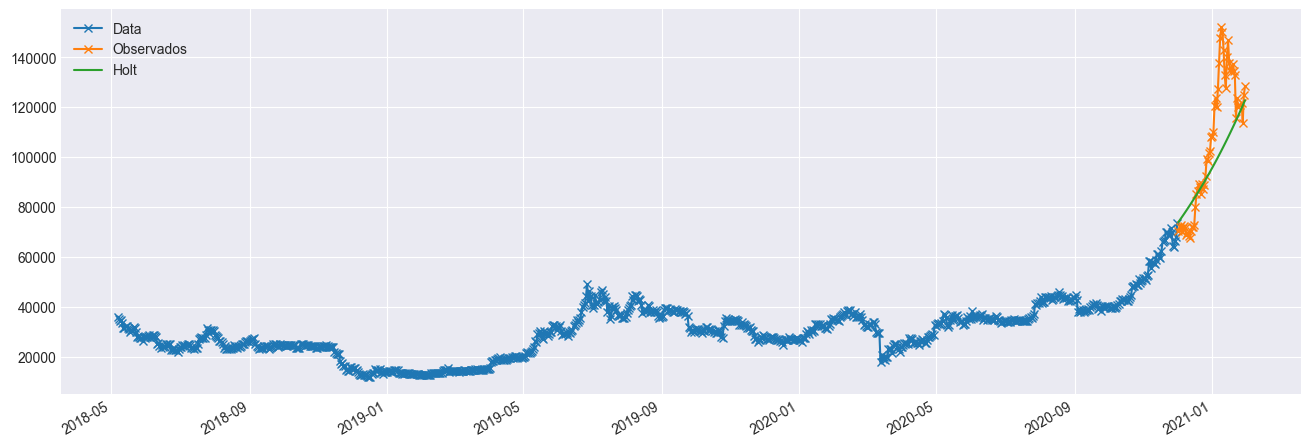

In [271]:
plt.figure(figsize=(16,5))

plt.plot(train.index, train, label="Data", marker="x")
plt.plot(test.index, test, label="Observados", marker="x")
plt.plot(test.index, prediccion_holt, label="Holt")

plt.xlabel=("Date")
plt.legend()
plt.xticks(rotation=30, ha='right')
plt.show()

Como podemos ver, puede llegar a entender la tendencia pero de una manera un poco "segura" o simplemente se equivoca y da valores por debajo de lo que debería.

Su ecuación será la representada anteriormente pero con los valores: 
* $\beta$ = 0.0225179
* $\alpha$ = 0.9007143

## 4.3. Modelo de Holt-Winters.
El método de Holt-Winters es una extensión del método de Holt, diseñado para modelar series temporales con tendencia y estacionalidad. Se basa en una combinación de tres ecuaciones de suavizado que permiten capturar:

* **El nivel** $\ell$: Representa el valor base de la serie en cada momento del tiempo.  
* **La tendencia** $b$: Captura la dirección y velocidad del cambio en la serie.  
* **La estacionalidad** $s$: Modela los patrones repetitivos que ocurren en intervalos regulares.  

Cada una de estas componentes se actualiza mediante ecuaciones de suavizado que dependen de parámetros específicos:

- $\alpha$: Controla cuánto peso tienen los nuevos datos en la actualización del nivel.  
- $\beta^*$: Determina cómo se ajusta la tendencia con cada nuevo dato.  
- $\gamma$: Ajusta la estacionalidad según las observaciones recientes.  


In [272]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

modelo_holt_winters = ExponentialSmoothing(train, trend="mul", seasonal="mul", seasonal_periods=periodo).fit()
prediccion_holt_winters = modelo_holt_winters.forecast(steps=tamano_test)

print(f"Mejor alpha: {modelo_holt_winters.params['smoothing_level']}")
print(f"Mejor beta: {modelo_holt_winters.params['smoothing_trend']}")
print(f"Mejor gamma: {modelo_holt_winters.params['smoothing_seasonal']}")

print(f"AIC {modelo_holt_winters.aic}")

Mejor alpha: 0.8889285714285714
Mejor beta: 0.032923280423280424
Mejor gamma: 0.049365079365079376
AIC 13543.583496340178


c:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


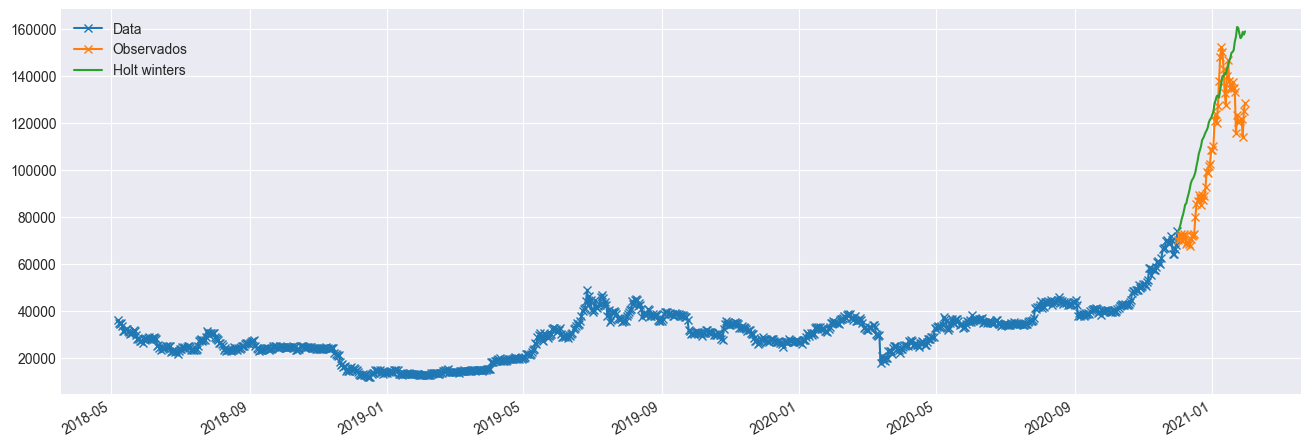

In [273]:
plt.figure(figsize=(16,5))

plt.plot(train.index, train, label="Data", marker="x")
plt.plot(test.index, test, label="Observados", marker="x")
plt.plot(test.index, prediccion_holt_winters, label="Holt winters")

plt.xlabel=("Date")
plt.legend()
plt.xticks(rotation=30, ha='right')
plt.show()

Este resultado es bastante malo, y este resultado es bastante similar tanto en multiplicativo como en aditivo. 

# 5 y 7. Modelo ARIMA.

## 5.1. Función de Autocorrelación ACF.
La función de autocorrelación mide la correlación entre la serie de tiempo y versiones desplazadas de sí misma en distintos desfases (lags). 

Interpretación de la ACF:
* Si la ACF muestra valores altos en ciertos lags, significa que la serie tiene memoria y hay una relación fuerte entre los valores actuales y pasados.
* Si la ACF disminuye lentamente, la serie puede ser no estacionaria.
* Si la ACF cae bruscamente después de cierto lag, indica la presencia de un proceso AR (AutoRegresivo).

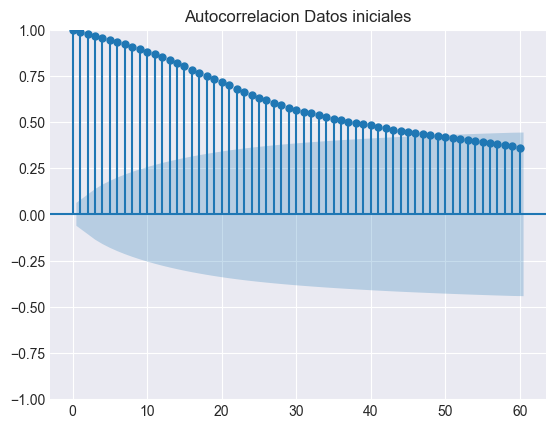

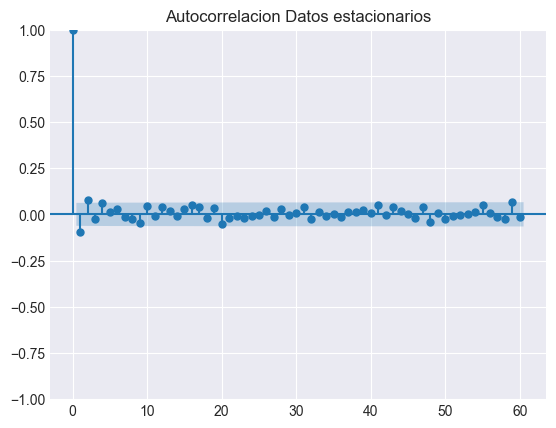

In [274]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(df, lags=periodo, title="Autocorrelacion Datos iniciales")
plot_acf(df_fin, lags=periodo, title="Autocorrelacion Datos estacionarios")

plt.show()

## 5.2. Función de Autocorrelación Parcial PACF
Mide la correlación entre una serie temporal y sus retardos (lags), eliminando el efecto de los lags intermedios. 

La interpretación es la siguiente: 
* Picos significativos en ciertos lags
- Un pico en el lag $k$ significa que $X_t$ tiene una relación directa con $X_{t-k}$.
- Si el coeficiente es positivo, hay una relación directa.
- Si es negativo, hay una relación inversa.

* Corte brusco en la PACF
- Si la PACF se corta después de un cierto lag $p$ (es decir, los valores siguientes no son significativos), sugiere un modelo **AR(p)**.
- **Ejemplo**: Si la PACF tiene picos en lags 1 y 2, pero luego desaparecen, un **AR(2)** puede ser adecuado.

* Si la PACF no se corta rápidamente
- Indica que el proceso no es puramente **AR**, sino que podría requerir un modelo más complejo, como **ARMA** o **ARIMA**.


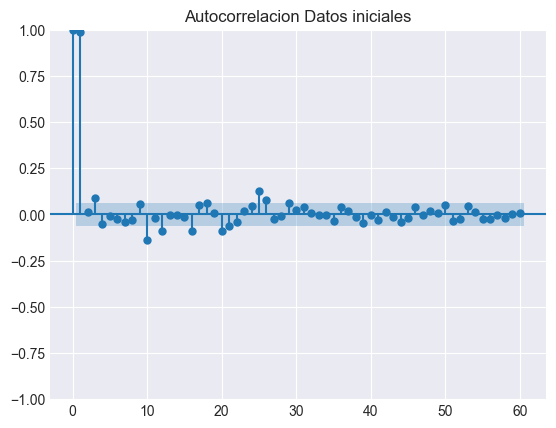

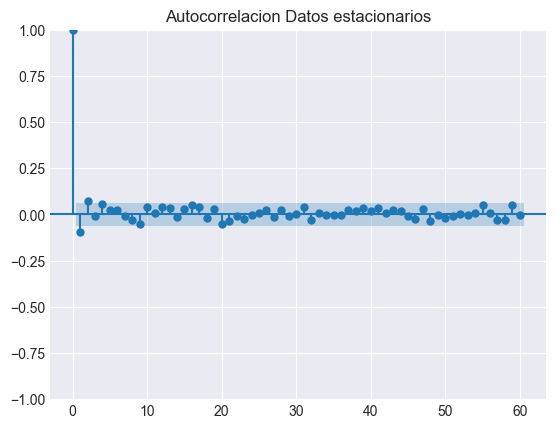

In [275]:
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(df, lags=periodo, title="Autocorrelacion Datos iniciales")
plot_pacf(df_fin, lags=periodo, title="Autocorrelacion Datos estacionarios")

plt.show()

## 5.3. Realción ACF y PACF con ARIMA.
Usualmente es dificil decir a simple vista que valores de p y q son los mas optimos para nuestra serie temporal, pero estos valores estan estrechamente relacionados con las graficas de ACF y PACF
1. Los datos podran seguir un ARIMA(p, d, 0) si los graficos son
* ACF -> exponencial decreciente o sinusoidal
* PACF -> Hay un pico significante en el lag p in la PACF, pero nada tras el lag p
2. Los datos podran seguir un ARIMA(0, d, q) si los graficos son
* PACF -> exponencial decreciente o sinusoidal
* ACF -> Hay un pico significante en el lag q in la PACF, pero nada tras el lag q 
Analizando ambas gráficas tenemos lo siguiente:

### p y q en los Datos iniciales.
* Como El ACF es decreciente constante deberemos usar un modelo autorregresivo AR(p)-> $q=0$
* Fijandonos en la gráfica PACF el valor de p será $p=2$

### p y q en los Datos estacionarios.
Va a ser una mezcla entre Autorregresivo y medias moviles.
* El valor de q deberá ser: $q=2$
* El valor de p deberá ser: $p=1$

## 5.4. Integración. 
La I de Arima indica cuántas veces se debe diferenciar la serie para hacerla estacionaria, es decir, para eliminar tendencias o patrones sistemáticos en los datos.

- Si una serie tiene **tendencia**, significa que su **media cambia con el tiempo** → Necesita **diferenciación**.  
- Si la serie ya es **estacionaria**, no necesita diferenciación → Se usa $d = 0 $.

En nuestros datos de inicio deberemos poner una $d=1$ o $d=2$, mientras que nuestros datos estacionarios su valor será $d=0$

## 5.5. ARIMA.

In [276]:
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima

def realizar_arima(train, test, order):
    modelo = ARIMA(train, order=order).fit()
    print(modelo.summary())
    prediccion = modelo.forecast(steps=periodo, alpha=0.05)
    grafica(train, test, prediccion)

def realizar_autoarima(train, test):
    modelo = auto_arima(train, seasonal=False, stepwise=True, trace=True)
    print(modelo.summary())
    prediccion = modelo.predict(n_periods=periodo)
    grafica(train, test, prediccion)

def grafica(train, test, prediccion):
    plt.figure(figsize=(16,5))

    plt.plot(train.index, train, label="Data", marker="x")
    plt.plot(test.index, test, label="Observados", marker="x")
    plt.plot(test.index, prediccion)

    plt.xlabel=("Date")
    plt.legend()
    plt.xticks(rotation=30, ha='right')
    plt.show()


    

### ARIMA para los datos iniciales ARIMA(p, 1, 0)

                               SARIMAX Results                                
Dep. Variable:               open_SAR   No. Observations:                  940
Model:                 ARIMA(2, 1, 0)   Log Likelihood               -7973.511
Date:                Thu, 20 Mar 2025   AIC                          15953.022
Time:                        23:21:29   BIC                          15967.557
Sample:                    05-07-2018   HQIC                         15958.563
                         - 12-01-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0627      0.021     -2.959      0.003      -0.104      -0.021
ar.L2          0.0049      0.021      0.231      0.817      -0.036       0.046
sigma2      1.392e+06   2.23e+04     62.545      0.0

c:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


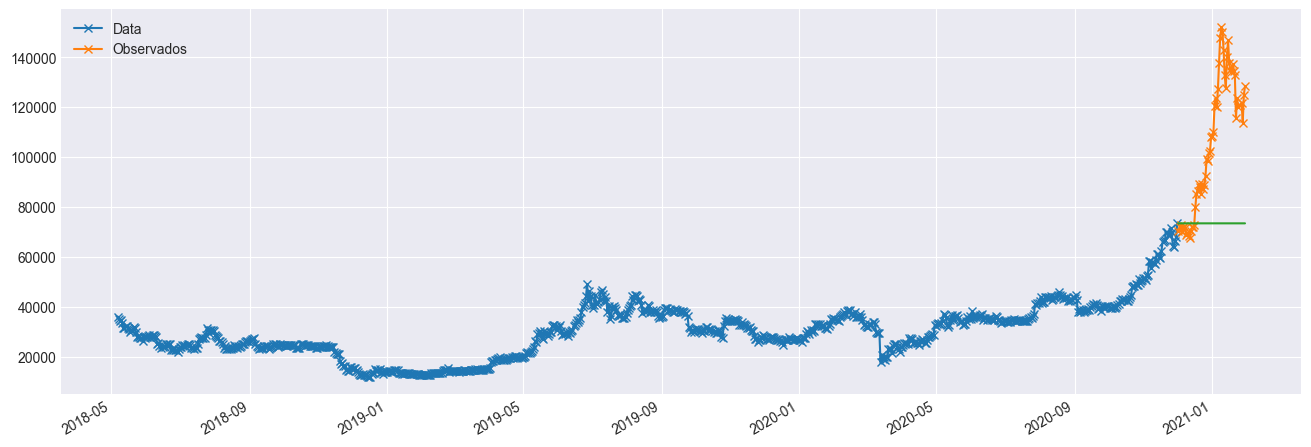

In [277]:
realizar_arima(train, test, order=(2, 1, 0))

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=5.04 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=16638.112, Time=0.12 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=16380.223, Time=0.20 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=2.83 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=16636.131, Time=0.03 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=16273.181, Time=0.43 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=16223.548, Time=0.62 sec
 ARIMA(4,2,0)(0,0,0)[0] intercept   : AIC=16200.666, Time=0.93 sec
 ARIMA(5,2,0)(0,0,0)[0] intercept   : AIC=16187.628, Time=0.83 sec
 ARIMA(5,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=7.84 sec
 ARIMA(4,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=9.39 sec
 ARIMA(5,2,0)(0,0,0)[0]             : AIC=16185.454, Time=0.31 sec
 ARIMA(4,2,0)(0,0,0)[0]             : AIC=16198.471, Time=3.10 sec
 ARIMA(5,2,1)(0,0,0)[0]             : AIC=inf, Time=4.62 sec
 ARIMA(4,2,1)(0,0,0)[0]             : AIC=inf, Ti

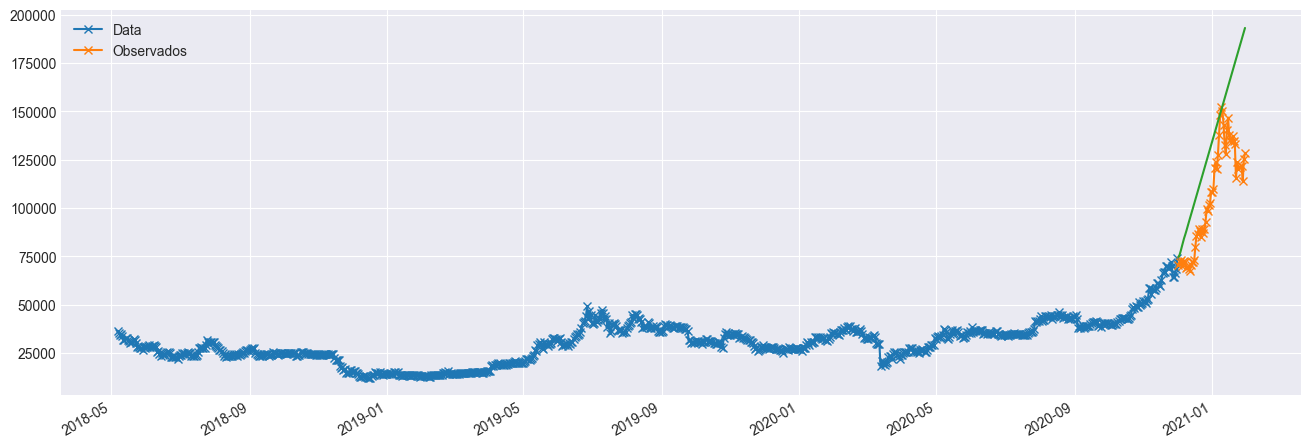

In [278]:
realizar_autoarima(train, test)

En este caso me parece bastante curioso el modelo que nos da como resultaod el modulo de *pmdarima* ya que nos da una autorregresion bastante empinada y que no está del todo desencaminada. No entiendo sinceramente el problema de los datos, creo que he seguido los datos que hay en los apuntes y en los videos de clase.

### ARIMA para los datos estacionarios ARIMA(1, 0, 2)

                               SARIMAX Results                                
Dep. Variable:               open_SAR   No. Observations:                  939
Model:                 ARIMA(1, 0, 2)   Log Likelihood                1743.278
Date:                Thu, 20 Mar 2025   AIC                          -3476.555
Time:                        23:22:09   BIC                          -3452.331
Sample:                    05-08-2018   HQIC                         -3467.320
                         - 12-01-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0008      0.001      0.579      0.563      -0.002       0.003
ar.L1         -0.2468      0.366     -0.675      0.500      -0.963       0.470
ma.L1          0.1437      0.365      0.394      0.6

c:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


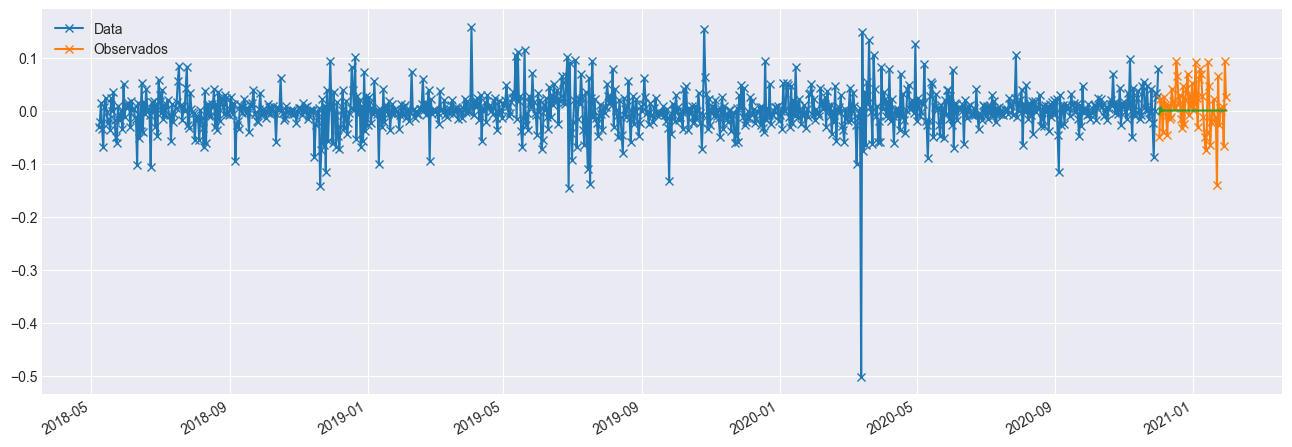

In [279]:
realizar_arima(train_fin, test_fin, (1, 0, 2))

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-3478.215, Time=2.42 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-3467.608, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-3476.920, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-3475.342, Time=0.87 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-3478.123, Time=0.65 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-3478.595, Time=0.59 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-3480.589, Time=2.36 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=-3479.423, Time=0.97 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=-3480.420, Time=0.27 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-3479.017, Time=0.59 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0]          
Total fit time: 8.865 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  939
Model:               SARIMAX(1, 0, 1)   Log Likeliho

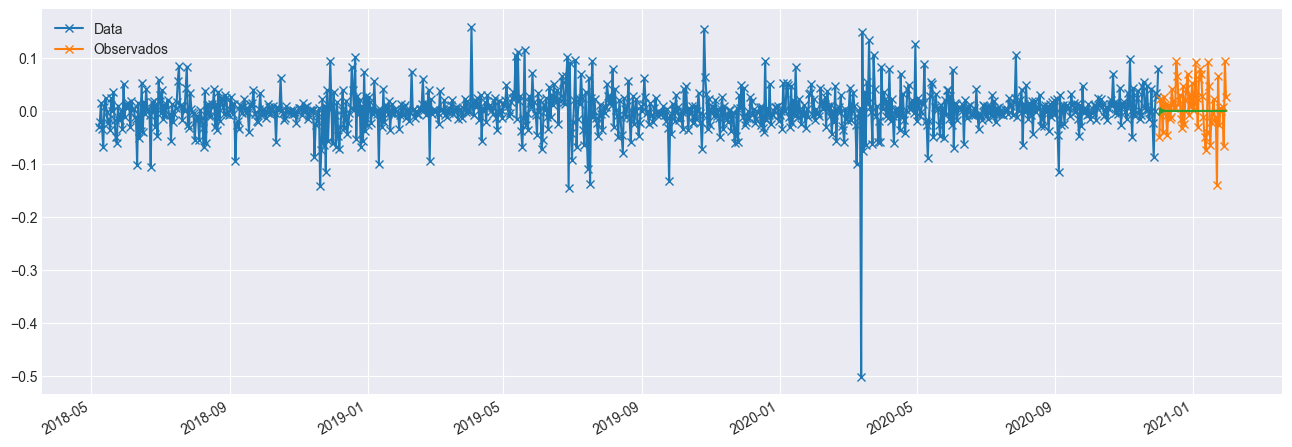

In [280]:
realizar_autoarima(train_fin, test_fin)

Ambos modelo dan la media del proceso, cosa que puedo hacer yo con un calculo sencillo, son bastante malos. 

# 6. Escribir la expresión algebraica del modelo ajustado.
Todos los modelos que nos han salido son bastante malos sinceramente. Dentro de lo malo voy a intentar escoger aquellos que nos recoimendan el propio modulo de ARIMA.

## 6.1. ARIMA para los datos iniciales.
ARIMA(5,2,0) -> $B^2 Y_t = \phi_1 B Y_{t-1} + \phi_2 B Y_{t-2} + \phi_3 B Y_{t-3} + \phi_4 B Y_{t-4} + \phi_5 B Y_{t-5} + \epsilon_t$

## 6.2. ARIMA para los datos estacionarios.
ARIMA(1, 0, 1)-> $Y_t = \phi_1 Y_{t-1} + \theta_1 \epsilon_{t-1} + \epsilon_t$


# 8. Comparar las predicciones obtenidas con cada uno de los métodos. 
No hay mucho que comparar, ya que la mayoría de los métodos son bastante limitados, excepto tres para los datos iniciales. En el caso de las series estacionarias, todos los modelos tienden a predecir solo la media, lo que hace que las predicciones no sean útiles. Por otro lado, para los datos iniciales, tenemos tres métodos que se destacan y ofrecen mejores resultados:
* ARIMA(5, 2, 0)
* Modelo de alisado doble 
* Modelo Holt-Winters

De manera gráfica creo que el mejor sería el Modelo de Alisado doble. 
De manera numerica tenemos:
Modelo de alisado doble: AIC=13306.538
Modelo Holt-Winters: AIC=13543.583496340178 
ARIMA(5,2,0): AIC=16187.628

Por lo que de manera numeríca tabién el mejor es el Modelo de Alisado Doble